## Lectura de datos

In [1]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# Carga conjunto de datos
datos = pd.read_csv("AED_diabetes.csv", header=None, names=col_names)
datos.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
feature_cols = ['pregnant', 'glucose', 'bp' ,'skin','insulin', 'bmi','pedigree','age']
feature_cols = ['pregnant', 'glucose', 'bp' ,'skin','insulin', 'bmi','pedigree','age']

X = datos[feature_cols] # Predictores
y = datos.label # Outcome

In [3]:
import pandas as pd
import numpy as np

X = datos.iloc[:,1:8]

corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,glucose,bp,skin,insulin,bmi,pedigree,age
glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
bp,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedigree,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [8]:
X

,glucose
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


##División del conjunto de datos en entretamiento / test --> CV

##Scikit-learn

In [7]:
# División Conjunto de Datos Entrenamiento / Test
# Controlamos la reproducibilidad en la división con random_state = 0
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(penalty='none', random_state = 0, max_iter=200).fit(X_train,y_train)
modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", modelo.coef_)
print("Precisión del modelo datos de entrenamiento (train):", modelo.score(X_train,y_train))
print("Precisión del modelo datos de validación (test):", modelo.score(X_test,y_test))

NameError: name 'y_train' is not defined

In [17]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(penalty='none', random_state = 0, max_iter=200).fit(X,y)
modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", modelo.coef_)
print("Precisión del modelo datos de entrenamiento (train):", modelo.score(X,y))
print("Precisión del modelo datos de validación (test):", modelo.score(X,y))

Intercept: [-8.4065821]
Coeficiente: [[ 1.23210681e-01  3.51686420e-02 -1.32925326e-02  6.21738657e-04
  -1.19225268e-03  8.97178341e-02  9.45628780e-01  1.48721208e-02]]
Precisión del modelo datos de entrenamiento (train): 0.7825520833333334
Precisión del modelo datos de validación (test): 0.7825520833333334


In [10]:
# Evaluación mediante validación cruzada
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', random_state=0, max_iter=200)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(scores)
print('Precisión del modelo con CV: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.74025974 0.67532468 0.71428571 0.7012987  0.76623377 0.76623377
 0.77922078 0.76623377 0.78947368 0.78947368]
Precisión del modelo con CV: 0.749 (0.038)


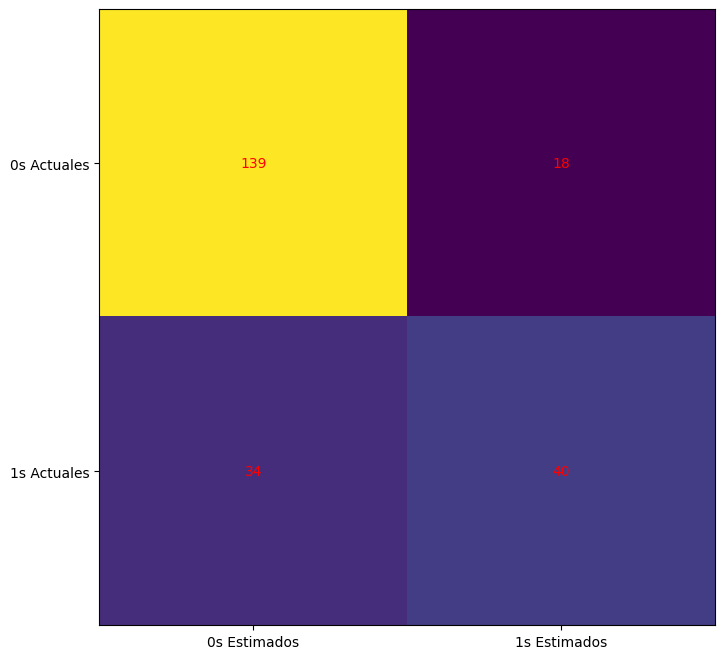

In [10]:
from sklearn import metrics
from matplotlib.pyplot import subplots, show

y_pred = modelo.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

fig, ax = subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Estimados', '1s Estimados'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Actuales', '1s Actuales'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
show()

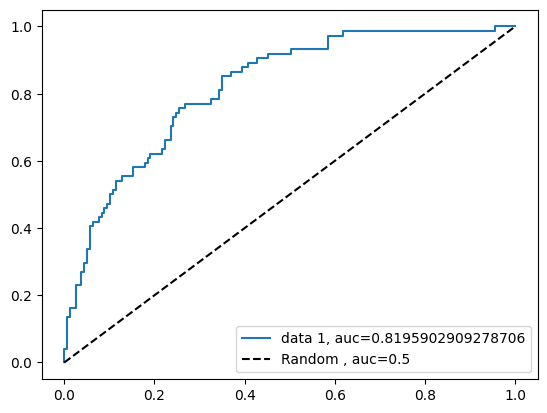

In [11]:
# import required modules
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random , auc=0.5')
plt.legend(loc=4)
plt.show()

##Statsmodels

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X, prepend=True)
modelo2 = sm.Logit(endog=y, exog=X_train,)
modelo2 = modelo2.fit()
print(modelo2.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 10 Jan 2023   Pseudo R-squ.:                  0.2718
Time:                        20:48:04   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4047      0.717    -11.728      0.000      -9.809      -7.000
pregnant       0.1232      0.

/Users/eve/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


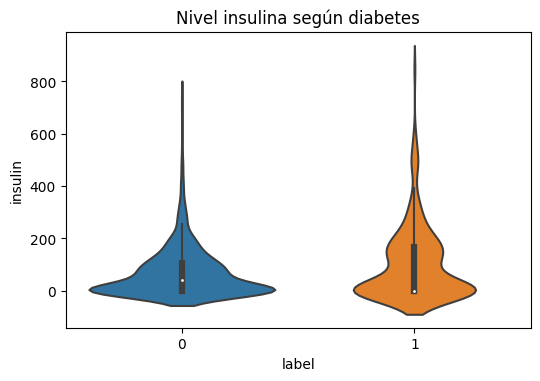

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'label',
        y     = 'insulin',
        data  = datos,
        #color = "white",
        ax    = ax
    )

ax.set_title('Nivel insulina según diabetes');

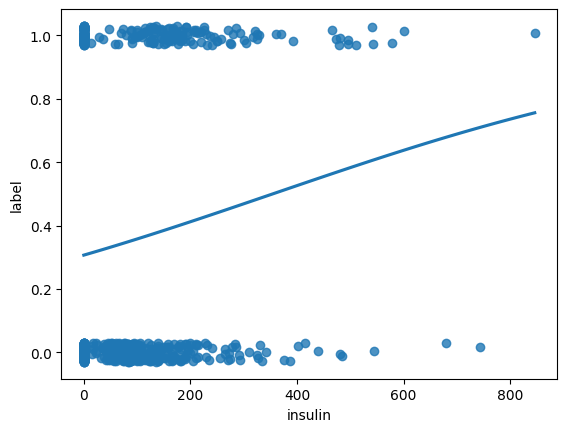

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="insulin", y="label",
            y_jitter = 0.03,
            data=datos,
            logistic=True,
            ci=None)
plt.show()

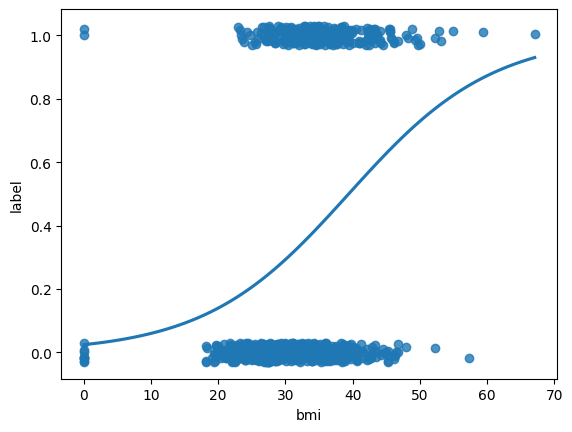

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="bmi", y="label",
            y_jitter = 0.03,
            data=datos,
            logistic=True,
            ci=None)
plt.show()

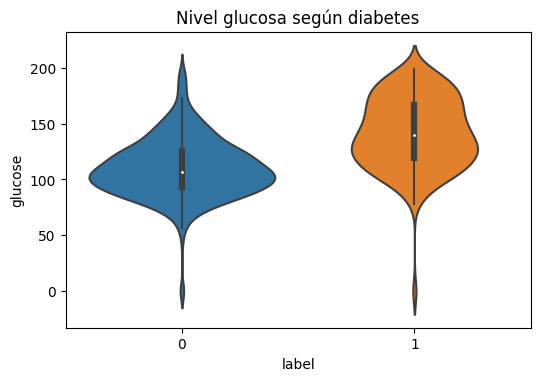

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'label',
        y     = 'glucose',
        data  = datos,
        #color = "white",
        ax    = ax
    )

ax.set_title('Nivel glucosa según diabetes');

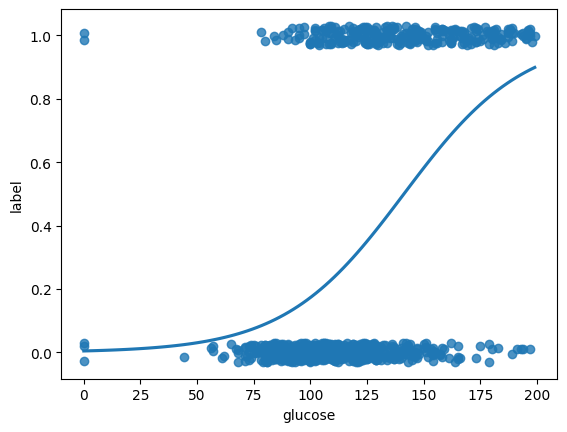

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="glucose", y="label",
            y_jitter = 0.03,
            data=datos,
            logistic=True,
            ci=None)
plt.show()

##Selección predictor insulin

In [19]:
# Adecuación de la matriz de datos de entrada
import pandas as pd
from numpy import array
X = array(datos['insulin']).reshape(-1,1)
y = array(datos['label'])

In [20]:
# División Conjunto de Datos Entrenamiento / Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [21]:
# fit the model with data
modelo.fit(X_train,y_train)
# test the model
y_pred=modelo.predict(X_test)
modelo.score(X_test,y_test)

0.6822916666666666

In [22]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", modelo.coef_)
print("Precisión del modelo:", modelo.score(X_test,y_test))

Intercept: [-0.79966585]
Coeficiente: [[0.0024493]]
Precisión del modelo: 0.6822916666666666


In [23]:
# fit the model with data
modelo.fit(X,y)
# test the model
y_pred=modelo.predict(X)
modelo.score(X,y)

0.6575520833333334

In [24]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean, std, absolute, sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', random_state=0, max_iter=200)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(scores)
print('Precisión del modelo con CV (k=7): %.3f (%.3f)' % (mean(scores), std(scores)))
sqrt(mean(absolute(scores)))

[0.67532468 0.64935065 0.64935065 0.62337662 0.64935065 0.68831169
 0.63636364 0.66233766 0.67105263 0.65789474]
Precisión del modelo con CV (k=7): 0.656 (0.018)


0.8101057710069276

In [25]:
# evaluate a logistic regression model using leave-one-out
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean, std, absolute, sqrt
cv = LeaveOneOut()
model = LogisticRegression(penalty='none', random_state=0)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Precisión del modelo con leave-one-out CV: %.3f (%.3f)' % (mean(scores), std(scores)))
sqrt(mean(absolute(scores)))

Precisión del modelo con leave-one-out CV: 0.656 (0.475)


0.8100925873009825

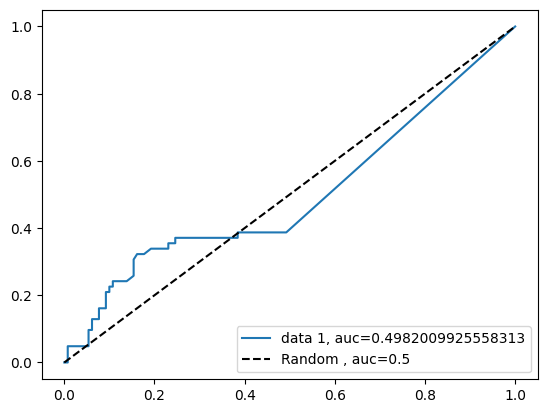

In [26]:
# import required modules
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random , auc=0.5')
plt.legend(loc=4)
plt.show()


##Selección predictor BMI

In [27]:
# Adecuación de la matriz de datos de entrada
import pandas as pd
from numpy import array
X = array(datos['bmi']).reshape(-1,1)
y = array(datos['label'])

In [28]:
# División Conjunto de Datos Entrenamiento / Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [29]:
# fit the model with data
modelo.fit(X_train,y_train)
# test the model
y_pred=modelo.predict(X_test)
modelo.score(X_test,y_test)

0.6875

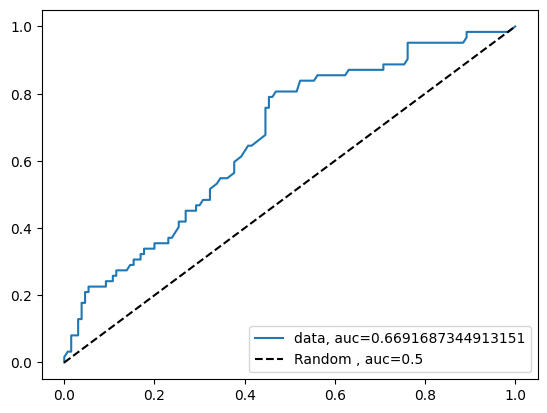

In [30]:
# import required modules
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random , auc=0.5')
plt.legend(loc=4)
plt.show()